In [1]:
# Using python 3.12.3

In [2]:
import numpy as np
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pygmt as gmt
import pooch

In [20]:
file_num_list = np.append(np.arange(0,21,0.5), np.arange(21,27))
i = 1
for identifier in file_num_list:
    ds = xr.open_dataset(f'ICE-6G_C Results/I6_C.VM5a_1deg.{identifier}.nc')
    ds.coords['time'] = identifier
    ds.time.attrs["long_name"] = 'Time Before Present'
    ds.time.attrs["units"] = "Ka"
    ds.to_netcdf(f'ICE-6G_Modified/UPDATE_DIM_I6_C.VM5a_1deg.{identifier}.nc')
    ds.close()
    i += 1

def preprocessing(ds): 
    return ds.expand_dims(dim='time')
ds = xr.open_mfdataset('ICE-6G_Modified/*.nc', combine="nested", concat_dim='time', preprocess=preprocessing)
ds = ds.sortby('time')

ds.to_netcdf("COMBINED_TIME_ICE-6G_C.nc")
ds.close()

In [22]:
ds

<xarray.Dataset> Size: 75MB
Dimensions:    (time: 48, lat: 180, lon: 360)
Coordinates:
  * lat        (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon        (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) float64 384B 0.0 0.5 1.0 1.5 2.0 ... 23.0 24.0 25.0 26.0
Data variables:
    sftlf      (time, lat, lon) float32 12MB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    sftgif     (time, lat, lon) float32 12MB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Topo_Diff  (time, lat, lon) float32 12MB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Topo       (time, lat, lon) float32 12MB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    orog       (time, lat, lon) float32 12MB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    stgit      (time, lat, lon) float32 12MB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
Attributes:
    Model:            ICE=ICE-6G_C, Viscosity=VM5a
    Date:             November 14,2014
    Author:           W.R. Peltier, Dept of Physics, Univ of Toronto,Canada
    Acknowledgement:  Please cite both PAPER1[describes the new Antarctic com...
    PAPER1:           Argus, D.F., Peltier, W.R., Drummond, R. and Moore, A.W...
    PAPER2:           Peltier, W.R., Argus, D.F. and Drummond, R. - Space geo...

In [ ]:
fig, ax = plt.subplots()
ds = xr.open_dataset("COMBINED_TIME_ICE-6G_C.nc")
ice_test = ds.stgit
time = 0.0 # Ka

lons = ds.lon
lats = ds.lat
lon, lat = np.meshgrid(lons, lats)

useProj = ccrs.Mercator()
fig = plt.figure(figsize=(9,6))

ax = plt.axes(projection=useProj)
ax.coastlines()
ax.gridlines()

ax.contourf(lon, lat, ice_test.sel(time = time, method = "nearest"), cmap = "RdBu_r", transform=ccrs.PlateCarree(), levels=10, )

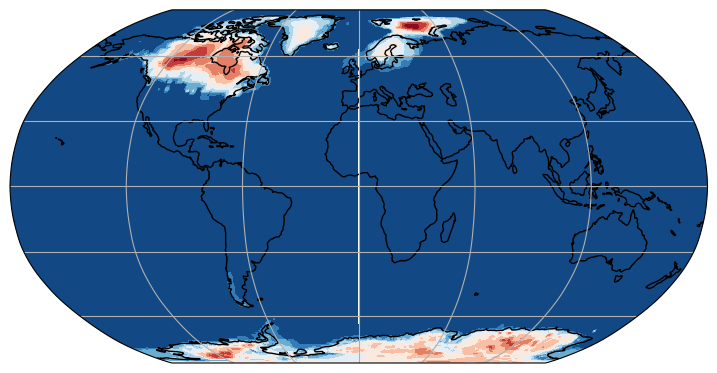

In [4]:
ds = xr.open_dataset("COMBINED_TIME_ICE-6G_C.nc")
ice_test = ds.stgit
time = 26.0 # Ka

lons = ds.lon
lats = ds.lat
lon, lat = np.meshgrid(lons, lats)

useProj = ccrs.Robinson()
fig = plt.figure(figsize=(9,6))

ax = plt.axes(projection=useProj)
ax.coastlines()
ax.gridlines()

ax.contourf(lon, lat, ice_test.sel(time = time, method = "nearest"), cmap = "RdBu_r", transform=ccrs.PlateCarree(), levels=10, )

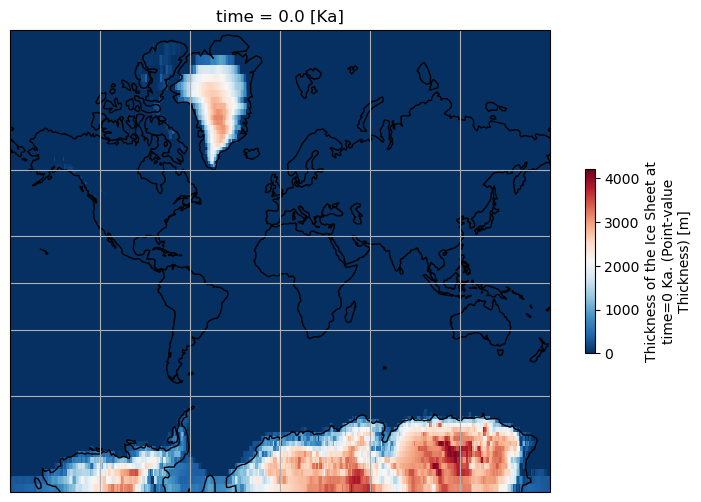

In [71]:
ds = xr.open_dataset("COMBINED_TIME_ICE-6G_C.nc")
ice_test = ds.stgit


lons = ds.lon
lats = ds.lat
lon, lat = np.meshgrid(lons, lats)

useProj = ccrs.Mercator()
fig = plt.figure(figsize=(9,6))
time = 0.0 # Ka

ax = plt.axes(projection=useProj)
ax.coastlines()
ax.gridlines()

ice_test.sel(time = time, method = "nearest").plot(ax = ax, transform = ccrs.PlateCarree(), cmap="RdBu_r", cbar_kwargs={'shrink':0.4})

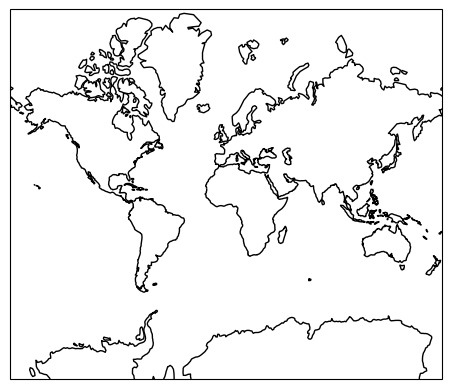

In [47]:
ax = plt.subplot(projection=useProj)
ax.coastlines()